In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [3]:
n=200
x = torch.ones(n,2)

In [38]:
x[:,0].uniform_(-2,2)**2

tensor([8.3792e-02, 1.6657e+00, 6.3435e-01, 9.8996e-01, 1.0629e+00, 4.9522e-01,
        2.8945e-01, 2.9856e+00, 1.8766e+00, 1.9386e+00, 1.3575e+00, 4.0487e-01,
        3.4334e+00, 3.5997e+00, 2.7582e+00, 4.2072e-01, 7.8447e-01, 1.0920e+00,
        9.4249e-02, 4.9986e-01, 6.1145e-04, 3.5949e+00, 3.0868e-01, 8.3316e-03,
        8.0891e-01, 4.5128e-02, 4.7144e-01, 3.5951e+00, 1.1071e+00, 2.2151e+00,
        6.8861e-02, 1.7961e+00, 5.6899e-01, 4.2021e-01, 9.3085e-01, 6.3711e-03,
        1.5840e+00, 1.8410e+00, 1.3869e+00, 1.8602e+00, 4.1979e-02, 3.2567e-01,
        3.8801e-01, 1.1623e+00, 1.3968e+00, 3.9041e-01, 3.8436e+00, 8.6321e-01,
        8.2867e-01, 3.1396e-01, 2.4988e-02, 2.0474e+00, 7.8093e-01, 2.2524e-01,
        2.3969e+00, 4.8672e-01, 7.7317e-01, 2.2786e+00, 3.0951e+00, 2.3300e+00,
        1.7922e+00, 2.5154e+00, 3.4462e+00, 2.4659e+00, 1.6660e-01, 4.1565e-01,
        3.1106e+00, 2.0923e+00, 5.5088e-04, 2.3022e-01, 8.0797e-01, 2.4542e+00,
        9.5950e-01, 2.7984e+00, 3.3060e-

In [39]:
a = torch.tensor([20.,-3])

In [42]:
y = x**2@a + torch.rand(n)

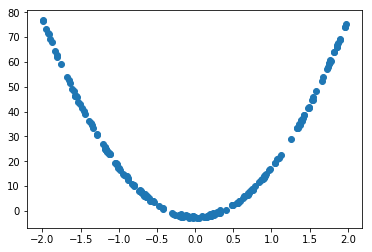

In [43]:
plt.scatter(x[:,0],y)

In [67]:
a = torch.tensor([-50.,80])

In [45]:
y_hat = x**2@a

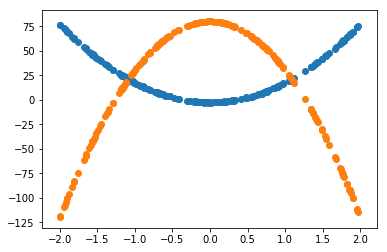

In [46]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [56]:
def mse(y_hat,y): return ((y_hat-y)**2).mean()

In [68]:
mse(y_hat,y)

tensor(6892.1289)

In [50]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [69]:
a = torch.nn.Parameter(a); a

Parameter containing:
tensor([-50.,  80.], requires_grad=True)

In [80]:
def update():
    y_hat = x**2@a
    loss = mse(y_hat, y)
    if t % 10 ==0:
        print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr*a.grad)
        a.grad.zero_()

In [81]:
lr = 1e-1

In [82]:
for t in range(100):
    update()

tensor(6892.1289, grad_fn=<MeanBackward1>)
tensor(857.8231, grad_fn=<MeanBackward1>)
tensor(177.1441, grad_fn=<MeanBackward1>)
tensor(36.6379, grad_fn=<MeanBackward1>)
tensor(7.6345, grad_fn=<MeanBackward1>)
tensor(1.6477, grad_fn=<MeanBackward1>)
tensor(0.4118, grad_fn=<MeanBackward1>)
tensor(0.1567, grad_fn=<MeanBackward1>)
tensor(0.1041, grad_fn=<MeanBackward1>)
tensor(0.0932, grad_fn=<MeanBackward1>)


In [83]:
a

Parameter containing:
tensor([19.9617, -2.4395], requires_grad=True)

In [84]:
a = torch.tensor([20.,-3]) # original tensor